<a href="https://colab.research.google.com/github/josestg/machine-learning-itera/blob/master/Regresi_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Regresi Linear</h1></center>

## Soal

Diketahui data pendapatan rata-rata dan penjualan pizza total selama 1 bulan di delapan buah kota adalah sebagai berikut.

Kota | Pendapatan rata-rata (1000$) | Penjualan pizza (1000 buah)
--- | --- | ---
1 | 5 | 27
2 | 10 | 46
3 | 20 | 73
4 | 8 | 40
5 | 4 | 30
6 | 6 | 28
7 | 12 | 46
8 | 15 | 59

1. Buat scatter plot.
2. Apakah kedua variabel ada korelasi?
3. Hitung dengan menggunakan LSE:
  - Slope
  - Intercept
  - R2

## Pembahasan

Dari soal diatas dapat dilihat bahwa ada dua variable yang terlibat, yaitu **Pendapatan rata-rata** dan **Penjualan pizza**, secara intuisi nilai **pendapatan** bergantung pada nilai **penjualan**. Oleh karena itu boleh difenisikan:

> $X$ : Penjualan pizza (1000 buah), dan 

> $Y$ : Pendapatan rata-rata (1000$)

dengan $X$ adalah variabel bebas dan $Y$ dependen variabel.

Sehingga persamaan linearnya dapat ditulis sebagai berikut:

>$ y(x) = b_0 + b_1x $  atau  $h_{\theta}(x) = \theta_{0}x_0 + \theta_{1}x_1 ;\ \ x_0 = 1$

In [1]:
# Meyiapkan data
import pandas as pd

data = pd.DataFrame([
    [1, 5, 27],
    [2, 10, 46],
    [3, 20, 73],
    [4, 8, 40],
    [5, 4, 30],
    [6, 6, 28],
    [7, 12, 46],
    [8, 15, 59]
], 
    columns=["Kota",
             "Pendapatan rata-rata (1000$)", 
             "Penjualan Pizza (1000 buah)"]
)

data

,Kota,Pendapatan rata-rata (1000$),Penjualan Pizza (1000 buah)
0,1,5,27
1,2,10,46
2,3,20,73
3,4,8,40
4,5,4,30
5,6,6,28
6,7,12,46
7,8,15,59


### Scatter Plot

Memetakan setiap pasangan titik $(x_i, y_i)$ dengan $x_i \in X$ dan $y_i \in Y$ kedadalam koordinat Cartesian.


In [2]:
pendapatan = data["Pendapatan rata-rata (1000$)"] 
penjualan =  data["Penjualan Pizza (1000 buah)"]

In [3]:
import matplotlib.pyplot as plt
plt.scatter(penjualan, pendapatan)
plt.xlabel("Penjualan Pizza (1000 buah)")
plt.ylabel("Pendapatan rata-rata (1000$)")
plt.show()

<Figure size 640x480 with 1 Axes>

### Apakah kedua variabel ada korelasi?

Dengan melihat *Scatter Plot* boleh dikatakan bahwa $X$ dan $Y$ **berkorelasi positif**.


#### Pearson's Correlation Coefficient
Karena pada soal merupakan data sampel maka digunakan *Pearson's correlation coefficient* ($r_{xy}$).

#  $r_{xy} = \frac{\sum{_{i=1}^{n}}{x_iy_i} - n\bar{x}\bar{y}}{(n-1)s_xs_y}$



dengan:

### $s_x = \sqrt{\frac{1}{n-1}\sum{_{i=1}^{n}}{(x_i-\bar{x})^2}}$ 

$s_x$ merupakan standar deviasi sampel.

sumber : https://en.wikipedia.org/wiki/Pearson_correlation_coefficient




In [4]:
def get_correlation(x,y):
  n = len(x)
  sum_xy = sum(x * y)
  nxybar = n * x.mean() * y.mean()
  divisor = (n - 1) * x.std() * y.std()
  r = (sum_xy - nxybar) / divisor
  
  return r

In [5]:
r = get_correlation(penjualan, pendapatan)
print("Korelasi Penjualan dengan pendapatan", r)

Korelasi Penjualan dengan pendapatan 0.9840325758520436


Ternyata benar bahawa penjualan dan pendapatan **berkorelasi positif** (seperti yang terlihat dari *Scatter plot*). Artinya nilai penjualan berbanding lurus dengan pendapatan.

### Menentukan Parameter dengan Menggunakan Metode Least Square Estimators (LSE)

Diketahui bahwa hipotesis seperti berikut.

> $y(x) = h_{\theta}(x) = \theta_{0}x_0 + \theta_1x_1; \ x_0=1$

Nilai $\theta_0$ dan $\theta_1$ diperoleh dengan mencari turunan parsial dari *SSE* yang bernilai nol terhadap $\theta_0$ dan $\theta_1$.

> ### $ SSE = \sum{_{i=1}^{n}}{error_i^2} = \sum{_{i=1}^{n}}{(y_{i}-\hat{y_i})^2} = \sum{_{i=1}^{n}}{(y_i - \theta_0x_0 - \theta_1x_i)^2}$

> ### $\frac{\partial(SSE)}{\partial\theta_0} = -2 \sum{_{i=1}^{n}}{(y_i-\theta_0-\theta_1x_i)}$

> ###  $ 0 = -2 \sum{_{i=1}^{n}}{(y_i-\theta_0-\theta_1x_i)}$

>  ### $ n\theta_0 + \theta_1\sum{_{i=1}^{n}}{x_i} = \sum{_{i=1}^{n}}{y_i}$

> ### $ \theta_0 = \frac{\sum{_{i=1}^{n}}{y_i} -  \theta_1\sum{_{i=1}^{n}}{x_i}}{n}$

> ### $\theta_0 = \bar{y} - \theta_1\bar{x}$

Dengan menggunakan metode yang sama maka diperoleh:


> ### $ \theta_1 = \frac{\sum{_{i=1}^{n}}{(x_i-\bar{x})(y_i-\bar{y})}}{\sum{_{i=1}^{n}}{(x_i-\bar{x})^2}} = \frac{\sum{_{i=1}^{n}}{x_iy_i}- n\bar{x}\bar{y}}{\sum{_{i=1}^{n}}{(x_i-\bar{x})^2}}$




### Menentukan Gradien ($\theta_1$)

In [6]:
n = len(penjualan)
sumxy = sum(penjualan * pendapatan)
nxybar = n * penjualan.mean() * pendapatan.mean()
divisor = sum((penjualan - penjualan.mean())**2)

theta_1 =  (sumxy - nxybar) / divisor
print("gradient dengan LSE", theta_1)

gradient dengan LSE 0.33335610355898626


### Menentukan Intercept ($\theta_0$)



In [7]:
theta_0 = pendapatan.mean() - theta_1 * penjualan.mean()
print("Intercept dengan LSE", theta_0)

Intercept dengan LSE -4.542660017760776


### Model

Dengan menggunakan $\theta_1 = 0.33335610355898626$ dan $\theta_0 = -4.542660017760776$. Maka diperoleh model sebagai berikut

> $h_{\theta}(x) = -4.542660017760776 + 0.33335610355898626x$

In [8]:
def regression(tehta_0, theta_1, x):
  return theta_0 + theta_1 * x

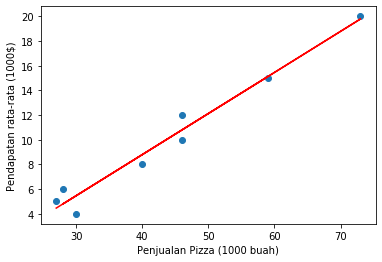

In [9]:
# plot regression
pedapatan_regression = regression(theta_0, theta_1, penjualan)
plt.scatter(penjualan, pendapatan)
plt.plot(penjualan, pedapatan_regression, c='r')
plt.xlabel("Penjualan Pizza (1000 buah)")
plt.ylabel("Pendapatan rata-rata (1000$)")
plt.show()

### Score

$R^2$ *score* merupakan ukuran yang menyatakan seberapa baik prediksi regresi mendekati data nyata. Semakin dekat nilai *score* ke 1 menunjukkan semakin cocok hasil prediksi regresi dengan data nyata.


> $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

> $SS_{res} = \sum{_{i}}{(y_i-\hat{y_i})^2}$

> $SS_{tot} = \sum{_{i}}{(y_i-\bar{y_i})^2}$

In [10]:
SST = sum((pendapatan - pendapatan.mean()) ** 2)
SSR = sum((pendapatan - pedapatan_regression) ** 2)
score = 1 - (SSR/SST)
print("Score regressi", score)

Score regressi 0.9683201103380077


In [11]:
# Menggunakan modul mlitera

In [27]:
from mlitera.linreg import LSE

In [28]:
X = penjualan.values.reshape((-1,1))
m = LSE().fit(X, pendapatan)

print("coefficient fo determination: ", m.score(pendapatan, m.predict(X)))
print("intercept: ", m.intercept_)
print("gradient: ", m.coef_)

coefficient fo determination:  0.9683201103380077
intercept:  -4.542660017760776
gradient:  [0.3333561]


In [29]:
pendapatan.values.shape, len(X)

((8,), 8)